In [1]:
import pandas as pnd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Question 01

In [2]:
nobel_data=pnd.read_csv('nobel.csv')
nobel_data

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


# Question 02

In [3]:
def most_victorious(nobel_data):
    country_name=str(nobel_data['birth_country'].mode().max())
    sex_count=nobel_data[nobel_data['birth_country']==country_name]['sex'].mode().max()
    return 'Country name is: '+country_name+' and most represented by sex: '+sex_count
most_victorious(nobel_data)

'Country name is: United States of America and most represented by sex: Male'

# Question 03

In [13]:
nobel_data['usa Winner']=nobel_data["birth_country"] == "United States of America"
nobel_data['decades']=(np.floor(nobel_data['year']/10)*10).astype(int)

# Question 04

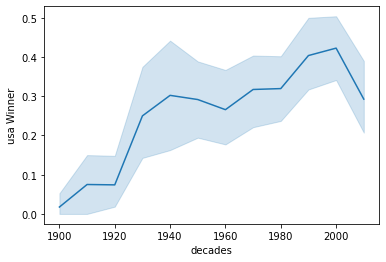

In [5]:
ax = sns.lineplot(x=nobel_data["decades"], y=nobel_data["usa Winner"])

# Question 05

<ipython-input-15-dbeba1b84382>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=nobel_data.groupby('female winner')['decades','category'].plot()


female winner
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

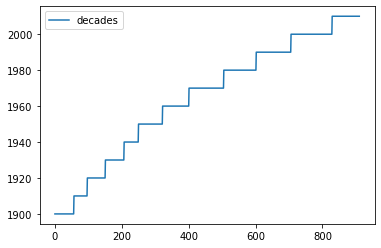

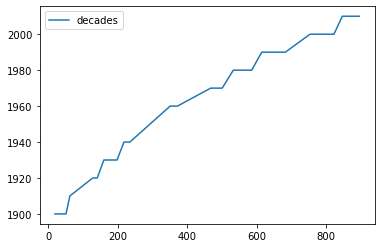

In [15]:
nobel_data['female winner']=nobel_data['sex']=='Female'
a=nobel_data.groupby('female winner')['decades','category'].plot()
a

# Question 06

In [16]:
first_female = nobel_data[nobel_data["sex"] == "Female"]
first_female.nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa Winner,decades,female winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [17]:
names = nobel_data.full_name.value_counts()
names[names > 1]

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

In [18]:
nobel_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'usa Winner', 'decades', 'female winner'],
      dtype='object')

In [39]:
nobel_data['birth_date'] = pnd.to_datetime(nobel_data["birth_date"])
nobel_data['age']=nobel_data['year']-nobel_data['birth_date'].dt.year
a=nobel_data[nobel_data['year']==2014]
a[a['age']==a['age'].min()]['full_name']

885    Malala Yousafzai
Name: full_name, dtype: object